## Exploratory analysis of Avocado prices
Dataset available at: https://www.kaggle.com/alanluo418/avocado-prices-20152019

This dataset contains information of avocado prices and sales volume in multiple US markets. The period covered by this dataset is from 2015 to 2020.

Question we want to answer: the recent trend 'avocado toast' worshiped by millenials caused an **increase on the total volume of avocado sales?** What about the prices, have they increased since avocados are no longer the bad green smooth of childhood and are now an instagramable meal?

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [2]:
avocado = pd.read_csv('Avocado.csv')

In [3]:
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany
3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany
4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany


In [4]:
avocado.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [5]:
avocado.shape

(27323, 13)

In [6]:
# changing the name of columns: 4046 stands for small/medium size, 4225 stands for large and so on
avocado.columns = ['Date', 'AveragePrice', 'Total Volume', 'Small/Medium', 'Large', 'XLarge', 
                   'Total Bags', 'Small Bags', 'Large','XLarge Bags', 'type', 'year', 'region']

In [7]:
'''avocado.index = pd.to_datetime(avocado['Date'],format='%Y-%m-%d')
avocado.groupby(by=[avocado.index.month, avocado.index.year])'''

"avocado.index = pd.to_datetime(avocado['Date'],format='%Y-%m-%d')\navocado.groupby(by=[avocado.index.month, avocado.index.year])"

In [8]:
avocado.head(10)

,Date,AveragePrice,Total Volume,Small/Medium,Large,XLarge,Total Bags,Small Bags,Large,XLarge Bags,type,year,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany
3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany
4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany
5,2015-02-08,0.99,51253.97,1357.37,39111.81,163.25,10621.54,10113.10,508.44,0.0,conventional,2015,Albany
6,2015-02-15,1.06,41567.62,986.66,30045.51,222.42,10313.03,9979.87,333.16,0.0,conventional,2015,Albany
7,2015-02-22,1.07,45675.05,1088.38,35056.13,151.00,9379.54,9000.16,379.38,0.0,conventional,2015,Albany
8,2015-03-01,0.99,55595.74,629.46,45633.34,181.49,9151.45,8986.06,165.39,0.0,conventional,2015,Albany
9,2015-03-08,1.07,40507.36,795.68,30370.64,159.05,9181.99,8827.55,354.44,0.0,conventional,2015,Albany


In [9]:
avocado.describe()

,AveragePrice,Total Volume,Small/Medium,Large,XLarge,Total Bags,Small Bags,Large,XLarge Bags,year
count,27323.000000,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,27323.000000,27323.000000
mean,1.400632,9.135469e+05,2.953187e+05,2.901059e+05,2.215868e+04,3.058740e+05,2.186982e+05,8.202537e+04,5150.387571,2016.956593
std,0.385439,3.702672e+06,1.273010e+06,1.187227e+06,1.031329e+05,1.274851e+06,8.881292e+05,3.917356e+05,30719.207766,1.406539
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.110000,1.361412e+04,7.964250e+02,2.922980e+03,0.000000e+00,7.703605e+03,5.283050e+03,2.773700e+02,0.000000,2016.000000
50%,1.370000,1.198654e+05,1.003785e+04,2.568849e+04,1.926900e+02,4.775039e+04,3.223150e+04,4.312490e+03,0.000000,2017.000000
75%,1.640000,4.747205e+05,1.133179e+05,1.454464e+05,5.898300e+03,1.461021e+05,1.048424e+05,3.268494e+04,450.665000,2018.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,2.347299e+07,1.543625e+07,8.378356e+06,844929.830000,2019.000000


### Observations
we can say that the distribution, when it comes to average price, is simetrical, since mean and median practically meet.

(array([1.180e+02, 9.480e+02, 2.996e+03, 4.789e+03, 5.085e+03, 4.933e+03,
        3.639e+03, 2.350e+03, 1.271e+03, 6.460e+02, 3.160e+02, 1.260e+02,
        7.700e+01, 2.600e+01, 3.000e+00]),
 array([0.44      , 0.62733333, 0.81466667, 1.002     , 1.18933333,
        1.37666667, 1.564     , 1.75133333, 1.93866667, 2.126     ,
        2.31333333, 2.50066667, 2.688     , 2.87533333, 3.06266667,
        3.25      ]),
 <a list of 15 Patch objects>)

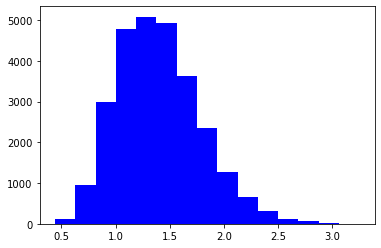

In [10]:
# Average price
plt.hist(avocado['AveragePrice'],bins=15, histtype='bar', color='blue')

In [11]:
# conventional x organic percent
type_data = (avocado['type'].value_counts()/avocado.shape[0])*100
print(type_data)

conventional    50.00183
organic         49.99817
Name: type, dtype: float64


In [12]:
# region of sales percent
region_data = (avocado['region'].value_counts()/avocado.shape[0])*100
print(round(region_data, 2))

Spokane                1.85
Sacramento             1.85
Chicago                1.85
Houston                1.85
Charlotte              1.85
                       ... 
StLouis                0.38
CincinnatiDayton       0.38
SouthCarolina          0.38
BaltimoreWashington    0.38
WestTexNewMexico       0.38
Name: region, Length: 78, dtype: float64


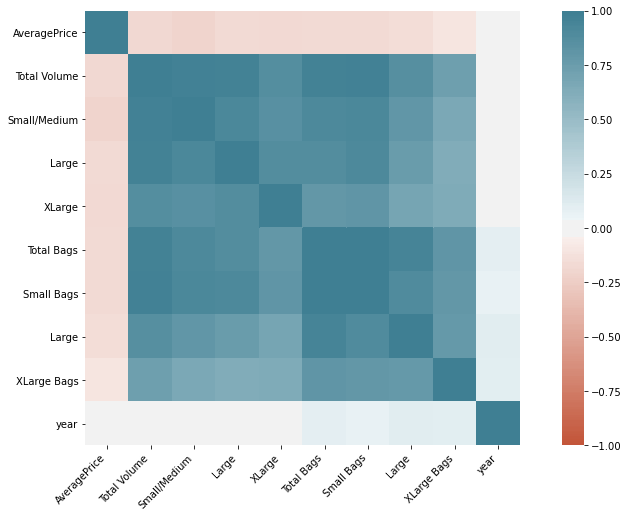

In [13]:
# correlation matrix to measure the strenght of the correlation between variables 
plt.figure(figsize=(15,8))
corr = avocado.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Question 1:
The volume of avocado sales has increased in the last few years?

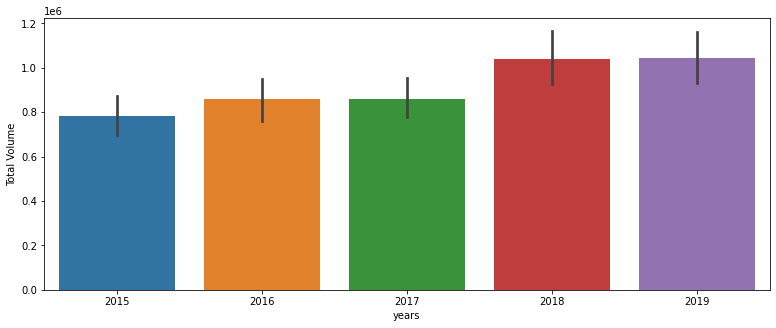

In [14]:
# ploting total volume x years
plt.figure(figsize=(13,5))
sns.barplot(x=avocado['year'],y=avocado['Total Volume'])
plt.xlabel('years')
plt.ylabel('Total Volume')
plt.show()

### Question 2:
Has the price of avocados increased in the last few years?

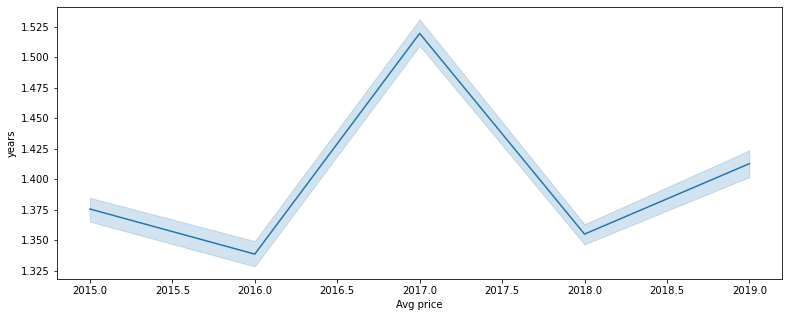

In [15]:
# ploting avg price x years
plt.figure(figsize=(13,5))
sns.lineplot(x=avocado['year'],y=avocado['AveragePrice'])
plt.xlabel('Avg price')
plt.ylabel('years')
plt.show()

### Obs
Avocados avg price had a peak of increase around the start of 2017, reaching 1.52 dollar (0.12 dollar above the average mean in the last 5 years). 

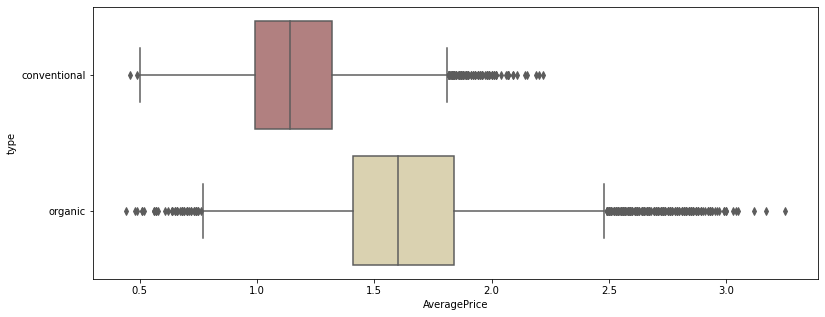

In [16]:
# Analysing Type of avocado X Avg price
# organic is in a range of 0.5 dollar more expensive
plt.figure(figsize=(13,5))
sns.boxplot(y="type", x="AveragePrice", data=avocado, palette = 'pink')

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

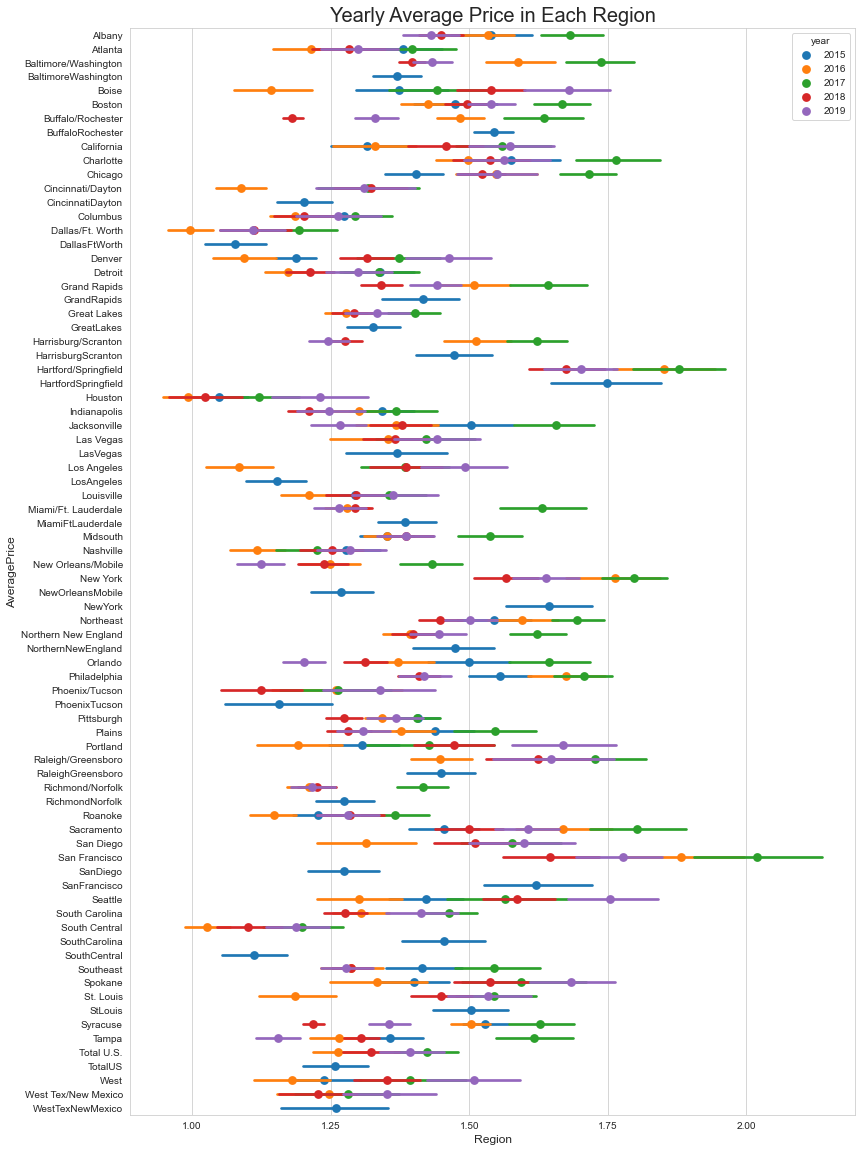

In [17]:
# Yearly avg price per region
import numpy as np
plt.figure(figsize=(13,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=avocado, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

-The green line that stands for 2017 is moslty the last line to appear in every year ofr avg price. This matches the peak of prices at this year on last graphics. 


-The ideal region for millenial to live would be Houston, the region on USA where the average price was the lowest.

-Doing some research, I gathered the following news:

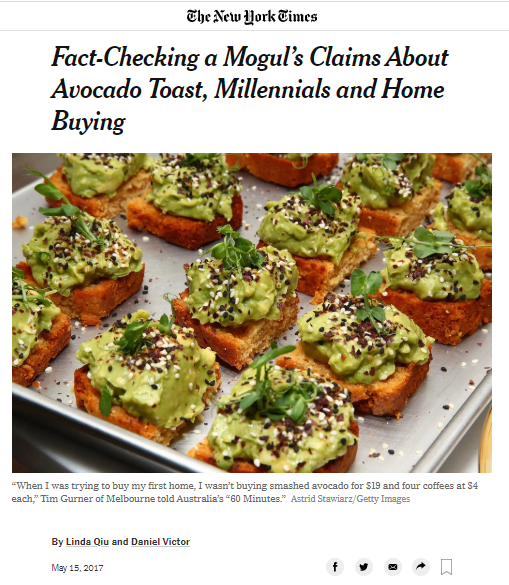

In [18]:
Image('ny times.png')

'Numbers Prove Millennials Don't Actually Love Avocados That Much. June 2017, available at: <https://www.nytimes.com/2017/05/15/business/avocado-toast-millennials.html>. 

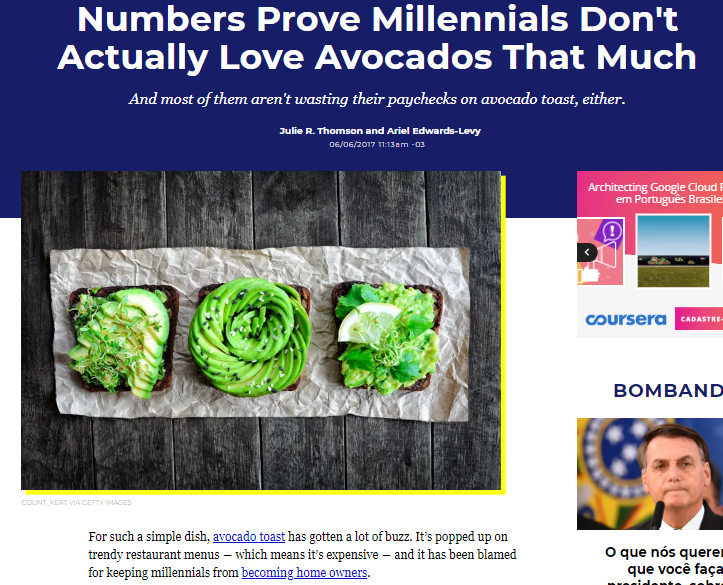

In [19]:
Image('huff post.png')

'Fact-Checking a Mogul’s Claims About Avocado Toast, Millennials and Home Buying'.May 2017, available at: <https://www.nytimes.com/2017/05/15/business/avocado-toast-millennials.html?utm_source=huffingtonpost.com&utm_medium=referral&utm_campaign=pubexchange_article>.

## Conclusions 
-Analysing the Avg Price X Year graph, we can see that the 2017 was the year when the price was higher than usual. On top of that, both journalistics pieces of NY Times and Huffington Post were published in mids 2017, also the time where average prices for avocado were the highest. We can say that the peak of the trend (and memes) for avocado toast were most likely around this year, which is probably correlated to the average price increase by nearly 0.20 dollars.

-The graph 'Yearly avg price per region' also corroborates this thesis: 2017 holds the highest average price in almost all of the regions of United States. The ideal region for millenials to live in order to keep the avocado toast habit would be Houston, area that holds the lowest prices.

-However, when it comes to Total Volume of Sales, 2018 and 2019 holds the highest scores. The total volume of sales presents a consistent growth since 2015 until nowadays: in general, avocado has been more purchased (consumed?) over time. 

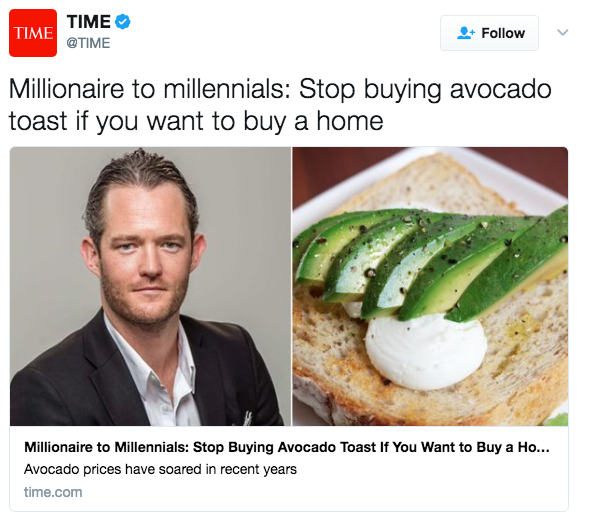

In [21]:
Image('88e.png')